### Countries clustering for HELP International

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataframe from csv file
df = pd.read_csv('country_data.csv')

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We don't have any missing values in our dataframe and all data types are in correct format. The dataframe consists of 167 countries each described using socio-economic and health factors.

Explanation of columns:
* **child_mort** - death of children under 5 years of age per 1000 live births
* **exports** - exports of goods and services per capita, given as percentage of the GDP per capita
* **health** - total health spending per capita, given as percentage of GDP per capita
* **imports** - imports of goods and services per capita, given as percentage of the GDP per capita
* **income** - net income per person
* **inflation** - the measurement of the annual growth rate of the total GDP
* **life_expec** - the average number of years a new born child would live if the current mortality patterns are to remain the same
* **total_fer** - the number of children that would be born to each woman if the current age-fertility rates remain the same
* **gdpp** - the GDP per capita, calculated as the total GDP divided by the total population

In [5]:
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


### Exploratory data analysis

In [6]:
# describe columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


<AxesSubplot:>

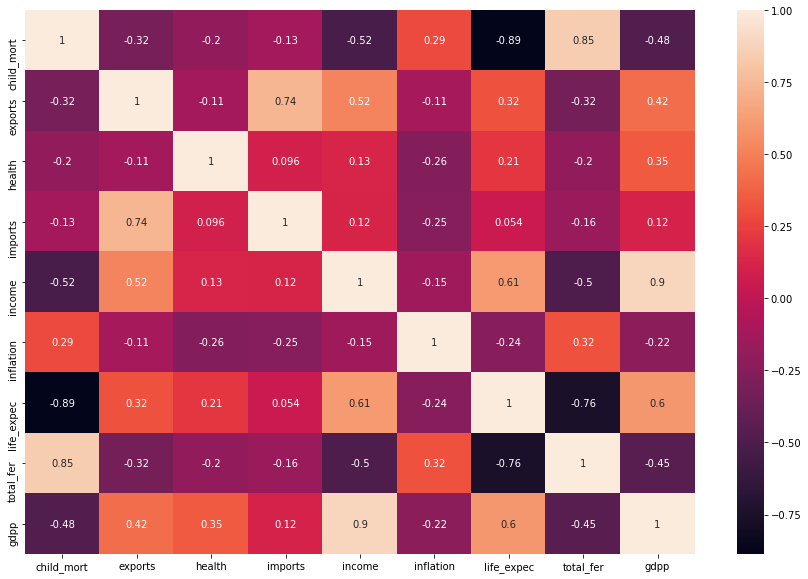

In [7]:
# correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Insights from the above heatmap:
- total fertility and child mortality have high negative correlation with life expectancy
- imports and exports have high positive correlation
- total fertility and child mortality have highly positive correlation
- income and gdpp have highly positive correlation

### Univariate analysis

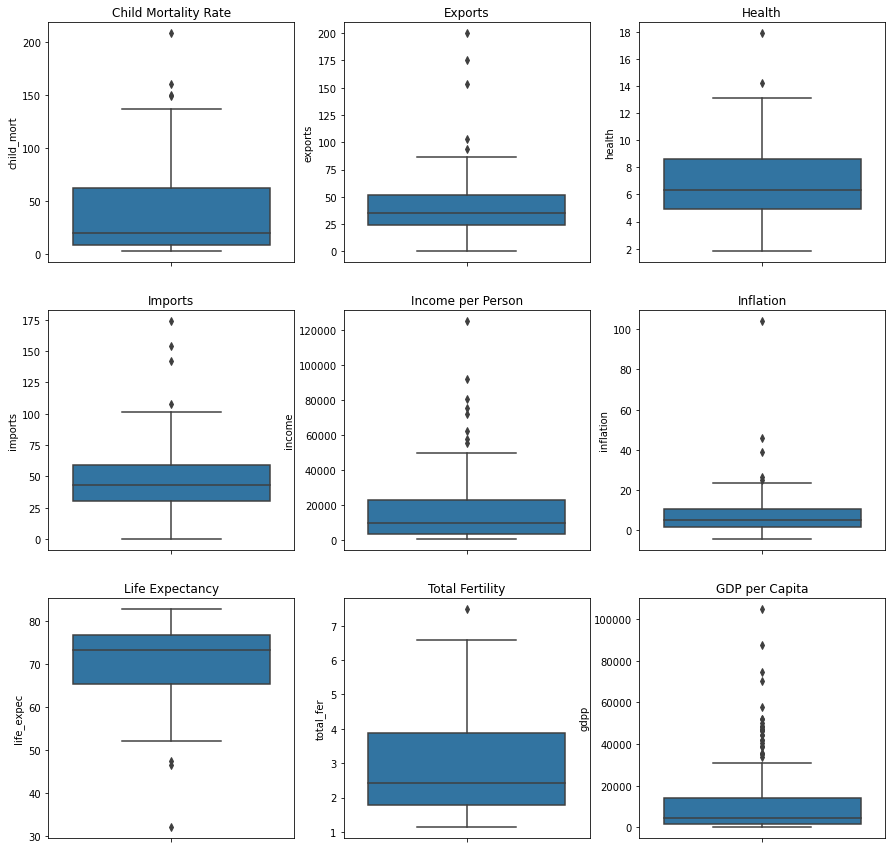

In [8]:
# boxplot for each numerical variable

f, axes = plt.subplots(3, 3, figsize=(15, 15))

s=sns.boxplot(y=df.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=df.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.boxplot(y=df.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.boxplot(y=df.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.boxplot(y=df.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.boxplot(y=df.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.boxplot(y=df.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=df.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=df.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')

s.get_figure().savefig('boxplot subplots.png')
plt.show()

From the above boxplots there can be concluded following:
- In case of gdpp there are lot of outliers.
- There could be a possibility in child_mort's subplot where those outliered-countries could be the needy ones because of the high child-mortality rate.
- Removing outliers is not a good option since we have limited number of countries. Hence, all outliers will be kept.

### Bivariate analysis

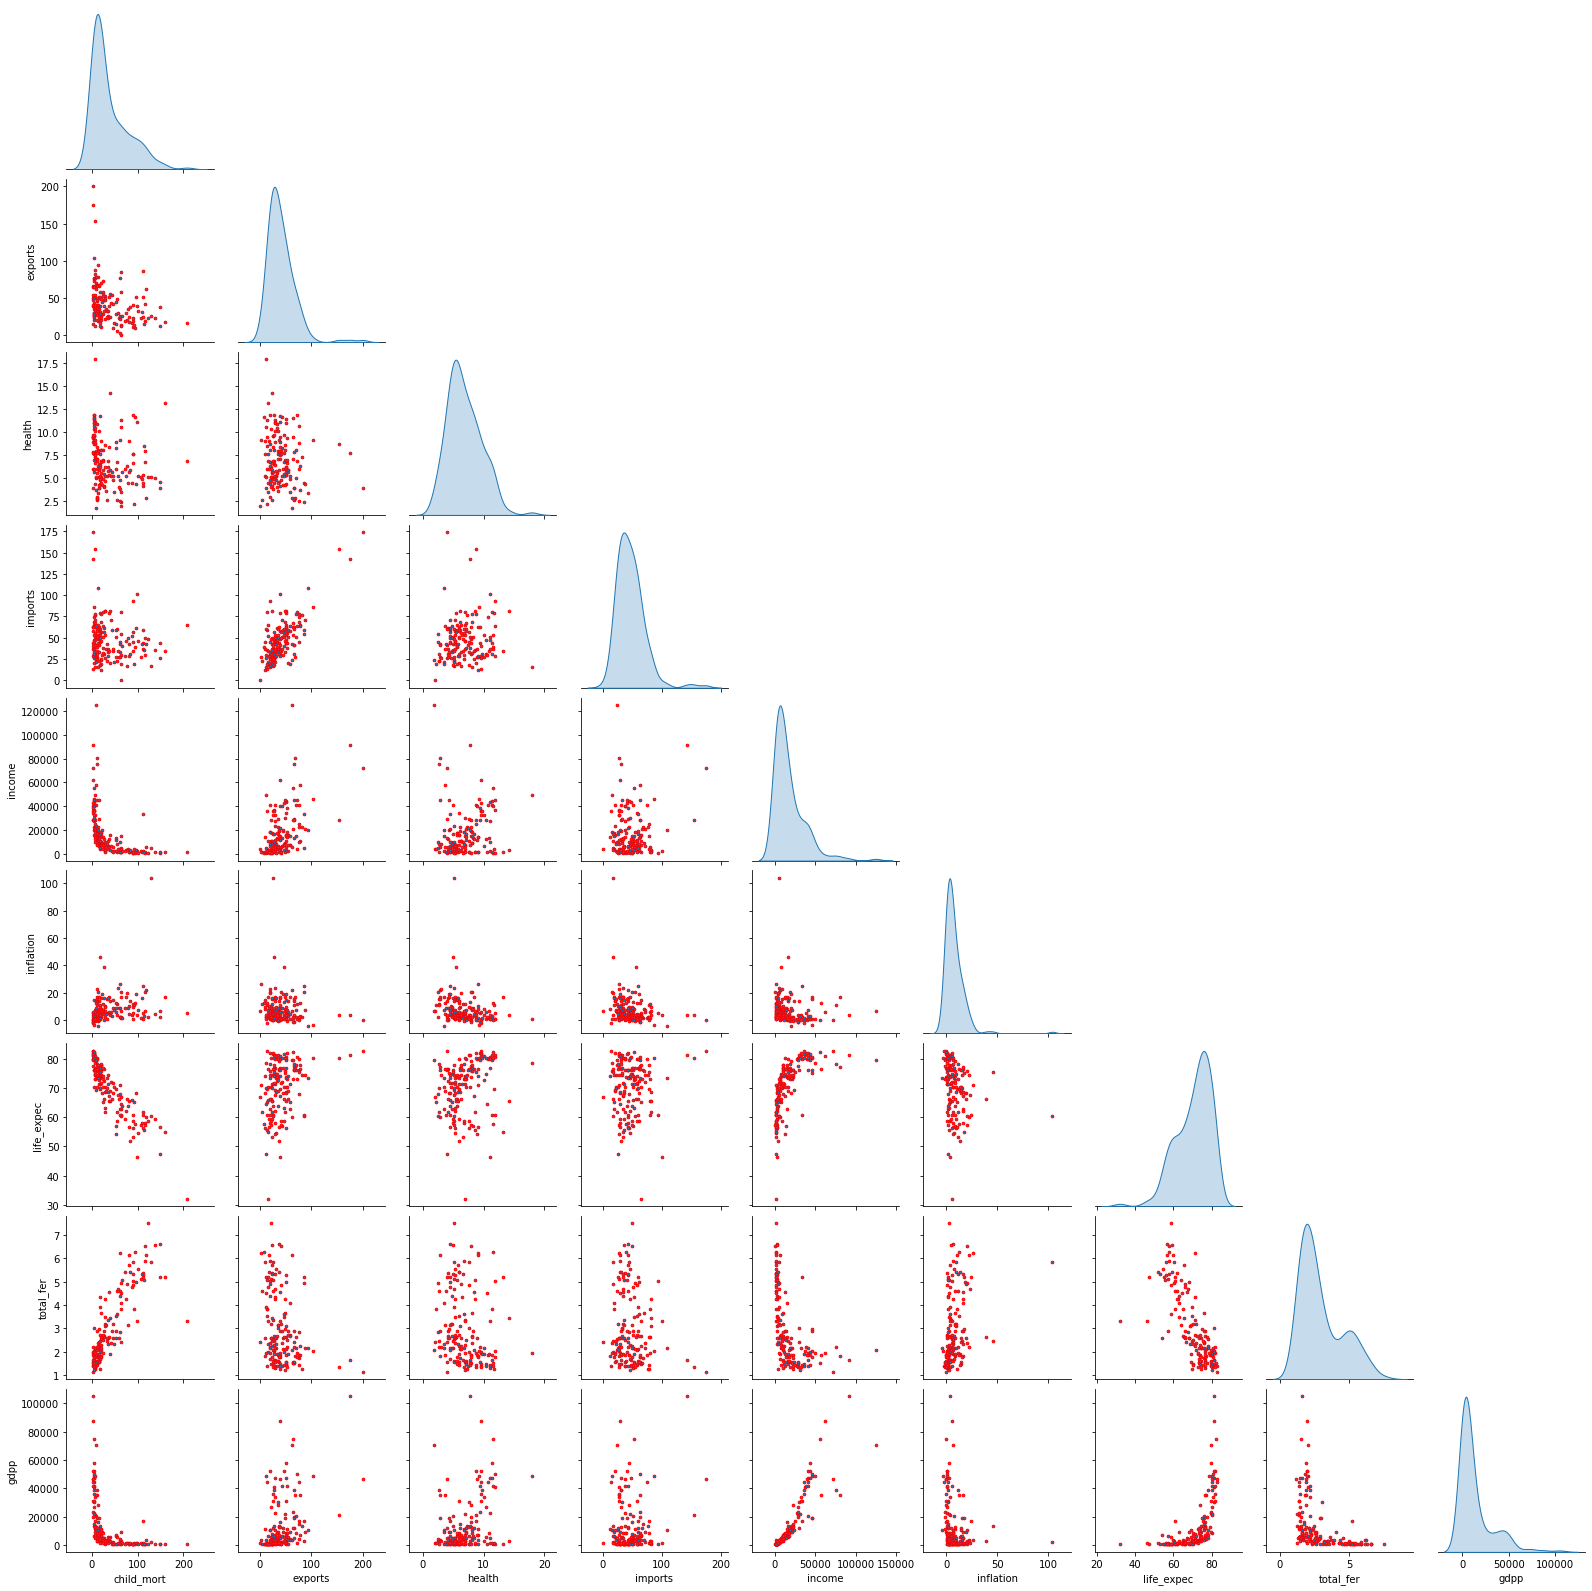

In [9]:
pair=sns.pairplot(df, diag_kind='kde', corner=True, plot_kws=dict(s=7, edgecolor="r", linewidth=1))

From the above plot there can be concluded:

- Linear relation can be found between gdpp and income, imports and exports, total_fer and child_mort
- if GDPP is high child_mort, total_fer and inflation are LOW
- if GDPP is high life_expec and income are high

### Data Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# drop string features 'country'
features = df.drop ('country', axis=1)

In [12]:
# create scaler object and scale features
scaler=StandardScaler()

scaled_features=scaler.fit_transform(features)

### Principal Component Analysis

In [13]:
from sklearn.decomposition import PCA,IncrementalPCA

In [14]:
# create PCA object
pca = PCA (svd_solver='randomized', random_state=42)

# fitting pca on the dataset
pca.fit(scaled_features)

#checking components
print("{} PCA components.\nList of components:\n{}".format(pca.n_components_,pca.components_))

9 PCA components.
List of components:
[[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.612982

### Explained Variance Ratio Barplot 

In [15]:
# variable for number of components
components=range(1, pca.n_components_+1)

components

range(1, 10)

In [16]:
# cumulative variance of the first 5 principal components
print("The cumulative variance of the first 5 principal components is {}".format(round(pca.explained_variance_ratio_.cumsum()[4],5)))

The cumulative variance of the first 5 principal components is 0.94531


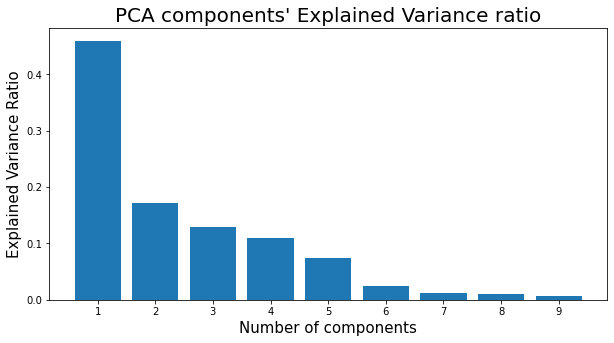

In [17]:
# barplot for pca components' explained variance ratio
plt.figure(figsize=(10,5))
plt.bar(components,pca.explained_variance_ratio_)
plt.xticks(components)
plt.title('PCA components\' Explained Variance ratio',fontsize=20)
plt.xlabel('Number of components',fontsize=15)
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.savefig('EVR PCA Barplot.png')
plt.show()

### Scree Plot

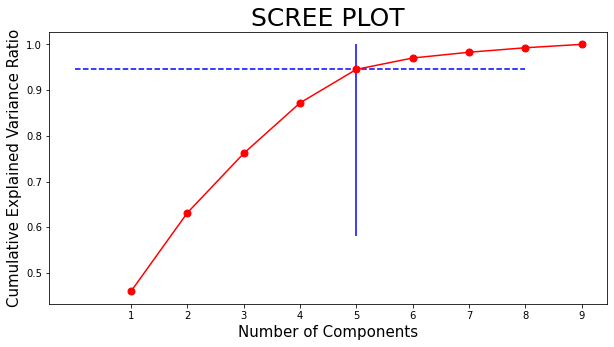

In [18]:
fig = plt.figure(figsize = (10,5))
plt.plot(components,np.cumsum(pca.explained_variance_ratio_),marker='o',markersize=7,color='r')
plt.title('SCREE PLOT',fontsize=25)
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=15)
plt.vlines(x=5, ymax=1, ymin=0.58, colors="b", linestyles="-")
plt.hlines(y=pca.explained_variance_ratio_.cumsum()[4], xmax=8, xmin=0, colors="b", linestyles="--")
plt.xticks(components)
plt.savefig('EVR PCA Screeplot.png')
plt.show()

### Visualizing PCA components

In [19]:
# creating dataframe of first 5 PCA Components
colnames = list(features.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})

pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


C:\Users\Korisnik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


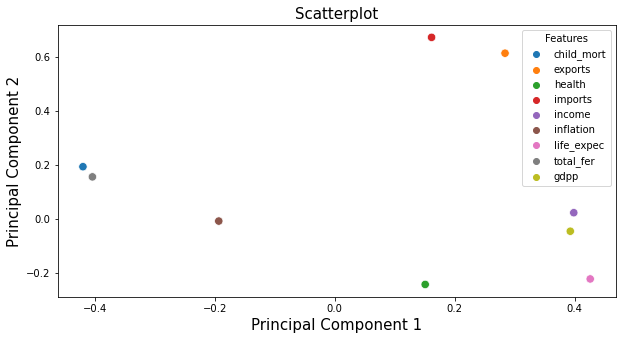

In [20]:
# visualization 
fig = plt.figure(figsize = (10,5))
sns.scatterplot(pca_data.PC1, pca_data.PC2,hue=pca_data.Features,marker='o',s=70)
plt.title('Scatterplot',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.savefig('PCA Scatterplot.png')
plt.show()

From the above plot there can be concluded:

- the first component is in the dirction where the imports, exports, gdpp, income, health, life_expec are heavy

### Incremental PCA

Let's go ahead and do dimensionality reduction using the 5 Principal Components.
Using Incremental PCA over normal PCA will use less Memory.

In [21]:
ipca = IncrementalPCA(n_components=5)
ipca = ipca.fit_transform(scaled_features)
ipcat = np.transpose(ipca)
pca_data = pd.DataFrame({'PC1':ipcat[0],'PC2':ipcat[1],'PC3':ipcat[2],'PC4':ipcat[3],'PC5':ipcat[4]})

pca_data

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025
164,0.498570,1.392777,-0.252849,-1.085037,1.156471
165,-1.887294,-0.105397,1.107639,0.062636,0.665467


### K-Means Clustering

In [22]:
from sklearn.cluster import KMeans

In [23]:
#creating list of ks for no. of clusters

ks=list(range(1,10))
plt.figure(figsize=(10,5))

ssd = []

<Figure size 720x360 with 0 Axes>

In [24]:
#iterating ks values and fitting each value to the kmeans model

for num_clusters in ks:
    model = KMeans(n_clusters = num_clusters, max_iter=50)
    model.fit(pca_data.iloc[:,:5])
    ssd.append(model.inertia_)

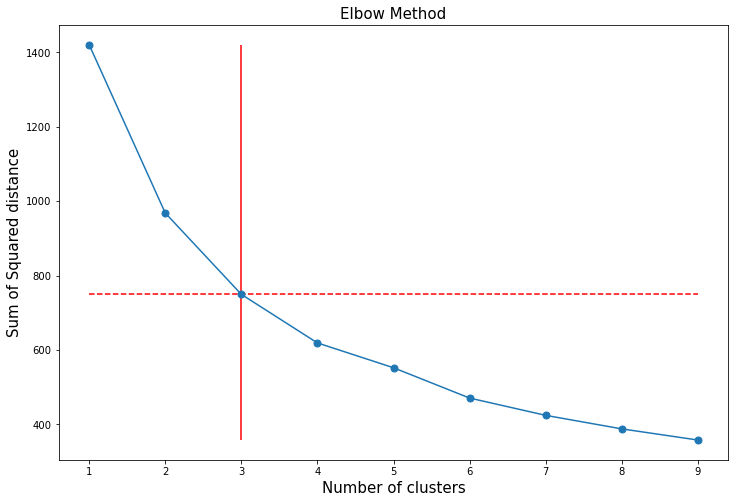

In [25]:
# elbow method
plt.figure(figsize = (12,8))
plt.plot(ks,ssd,marker='o',markersize=7)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.savefig('Kmeans elbow.png')
plt.show()

### Visualizing clusters on components

In [26]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
kmeans.fit(pca_data.iloc[:,:5])

KMeans(max_iter=50, n_clusters=3, random_state=50)

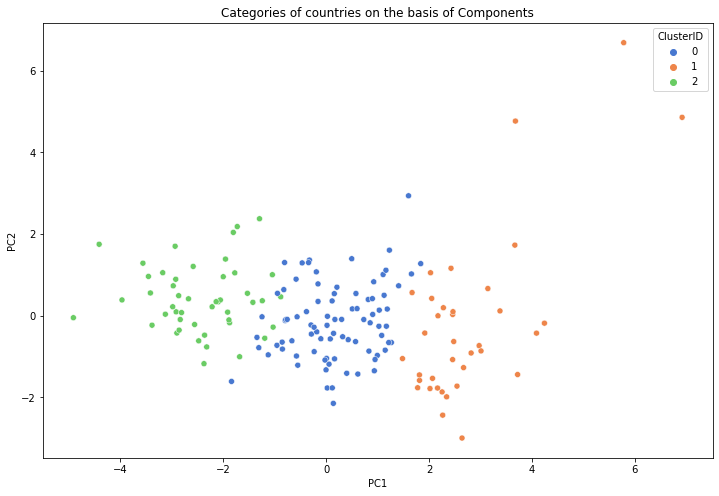

In [27]:
#adding produced labels to pca_data 
pca_data['ClusterID']= pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pca_data,palette="muted")
plt.title('Categories of countries on the basis of Components')
plt.savefig('Kmeans pca scatter.png')
plt.show()

In [28]:
# merging clusters with original dataset
final_df=pd.merge(df,pca_data.loc[:,'ClusterID'], left_index=True,right_index=True)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [29]:
# calculating mean of columns (child_mort, income, gdpp) for comparison

Cluster_GDPP=pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
Cluster_income=pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())

K_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income], axis=1)

K_mean_df

,gdpp,child_mort,income
ClusterID,,,
0,6486.452381,21.927381,12305.595238
1,42494.444444,5.000000,45672.222222
2,1922.382979,92.961702,3942.404255


- Countries with high gdpp and low child mortality are Developed countries
- Countries with low gdpp and low child mortality are Developing countries
- Countries with low gdpp and high child mortality are Under-developing countries

Let's rename clusters as follows:
Cluster 0 --> Developing,
Cluster 1 --> Developed,
Cluster 2 --> Under-developed

In [30]:
# renaming clusters
K_mean_df.rename(index={0: 'Developing'},inplace=True)
K_mean_df.rename(index={1: 'Developed'},inplace=True)
K_mean_df.rename(index={2: 'Under-developed'},inplace=True)

### Barplot clusters comparison

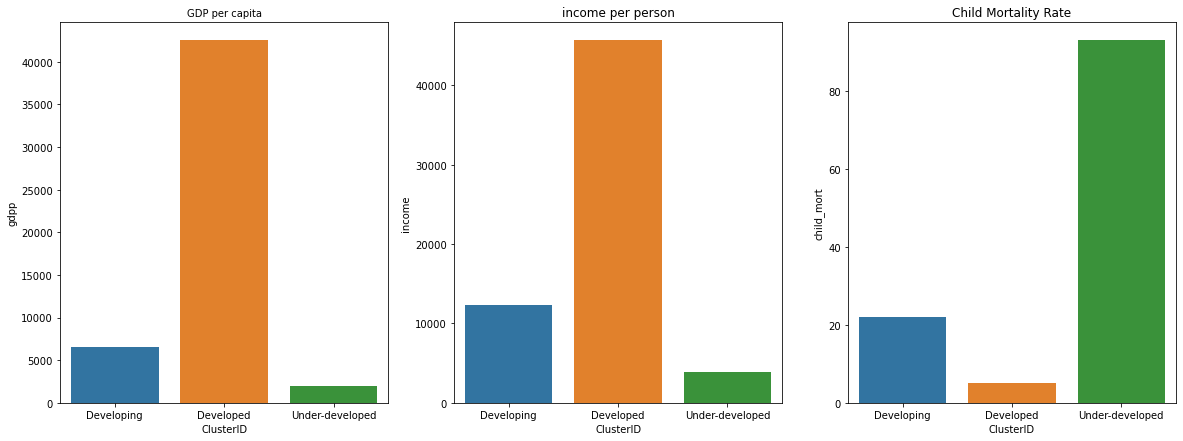

In [31]:
# barplot comparison
f, axes = plt.subplots(1, 3, figsize=(20,7))

s=sns.barplot(x=K_mean_df.index,y='gdpp',data=K_mean_df,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=10)

s=sns.barplot(x=K_mean_df.index,y='income',data=K_mean_df,ax=axes[1])
axes[1].set_title('income per person')

s=sns.barplot(x=K_mean_df.index,y='child_mort',data=K_mean_df,ax=axes[2])
axes[2].set_title('Child Mortality Rate')

s.get_figure().savefig('comparison subplots.png')
plt.show()

Above bar chart shows that:
- All the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and poor countries are having the least GDPP values.
- All the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.
- All the developed countries are having low number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and poor countries are having the least death rate.

### Underdeveloped countries analysis

In [33]:
for i,cluster in enumerate(final_df.ClusterID):
    if(cluster==0):
        final_df.loc[i,'Clustered Countries']='Developing'
    elif(cluster==1):
        final_df.loc[i,'Clustered Countries']='Developed'
    else:
        final_df.loc[i,'Clustered Countries']='Under-Developed'

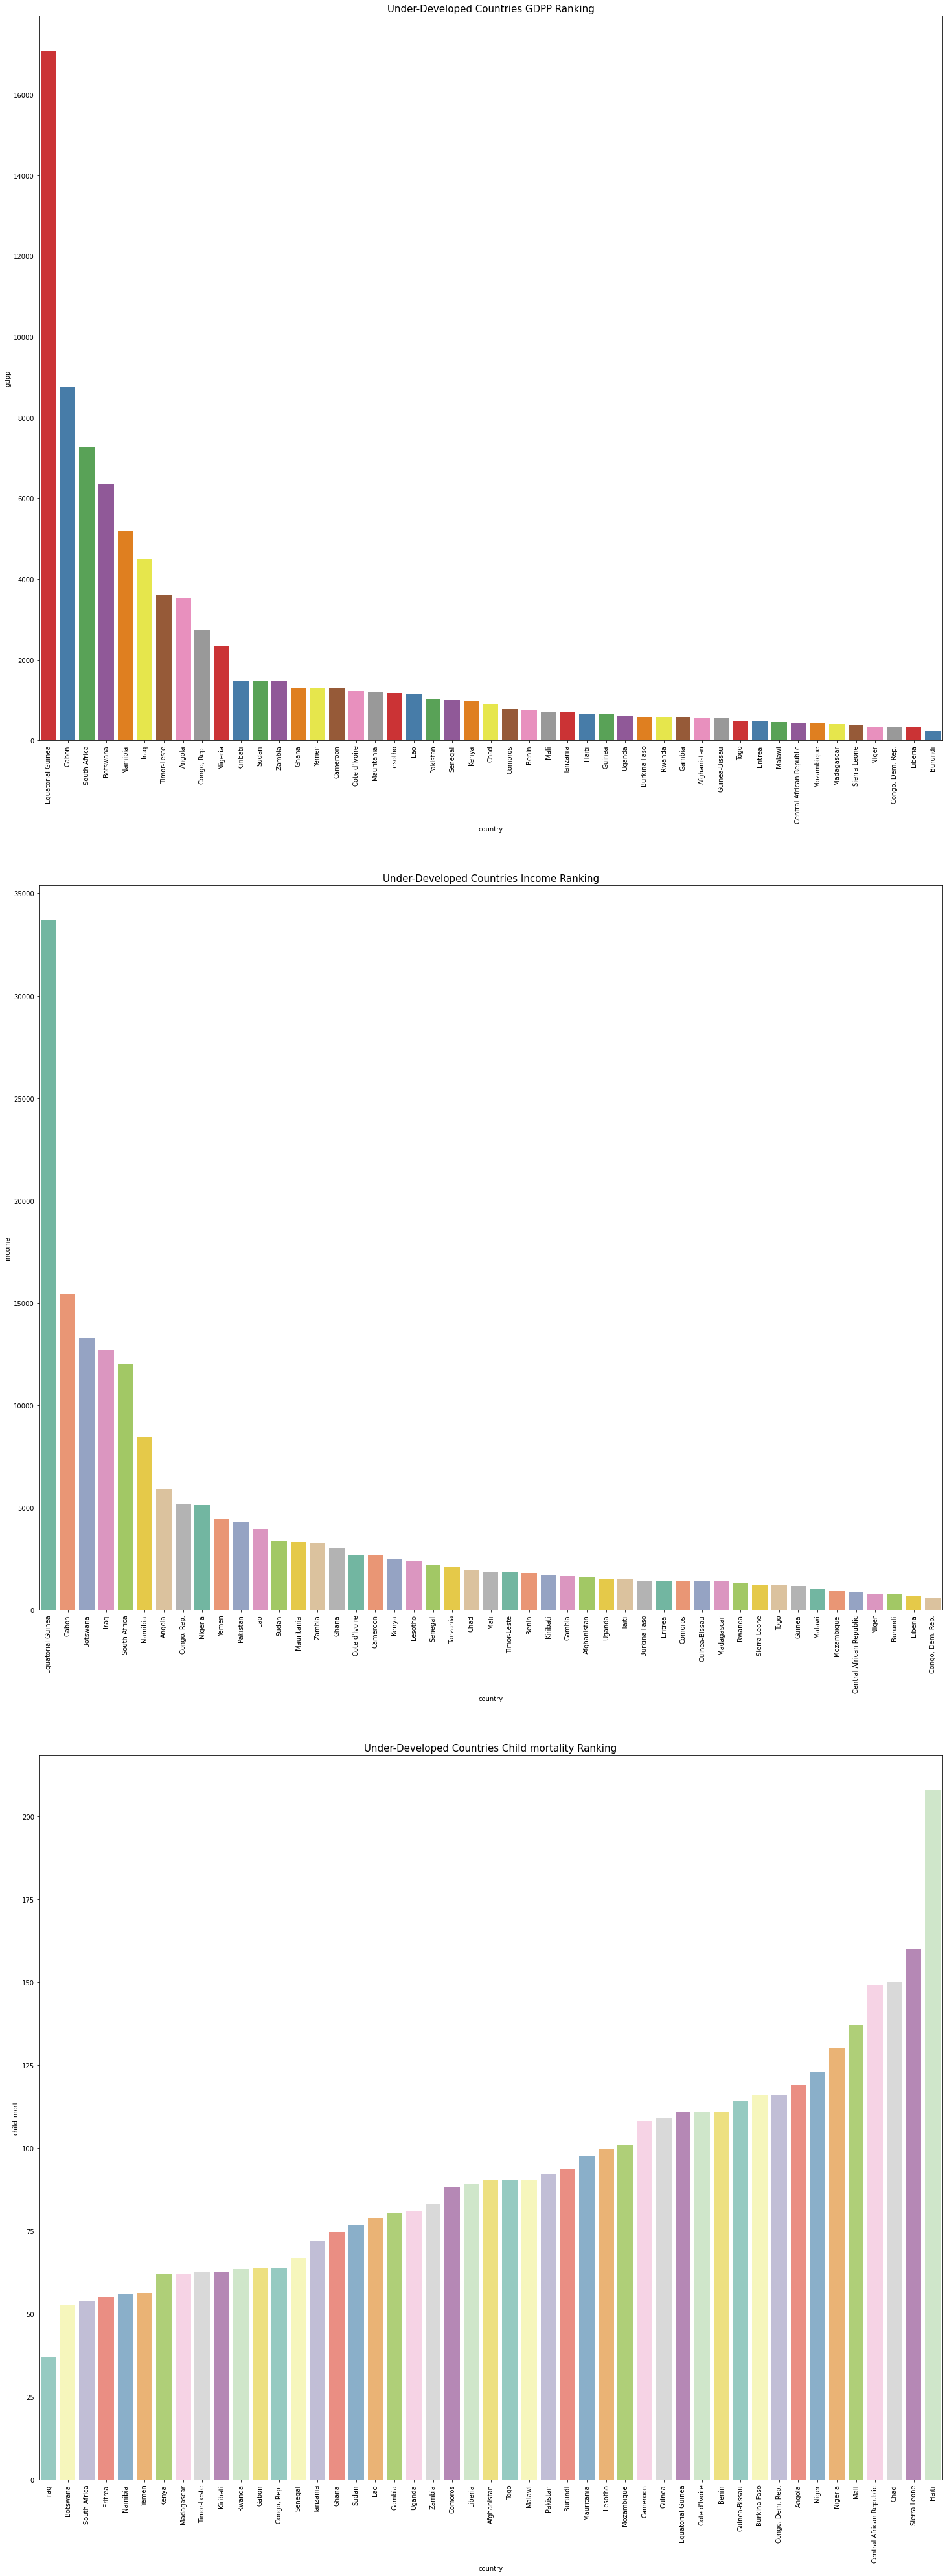

In [34]:
f, axes = plt.subplots(3, 1, figsize=(25,70))

gdp_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_under,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Under-Developed Countries GDPP Ranking',fontsize=15)

income_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='income',ascending=False)
s=sns.barplot(x='country',y='income',data=income_under,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Under-Developed Countries Income Ranking',fontsize=15)

child_under=final_df[final_df['Clustered Countries']=='Under-Developed'].sort_values(by='child_mort')
s=sns.barplot(x='country',y='child_mort',data=child_under,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Under-Developed Countries Child mortality Ranking',fontsize=15)

s.get_figure().savefig('Under-Developed Countries rankings.png')
plt.show()

In [35]:
#top 10 underdeveloped countries based on low GDPP
print('top 10 underdeveloped countries based on low GDPP\n')
for countries in gdp_under.country[:10]:
    print(countries)

#top 10 underdeveloped countries based on low income
print('\ntop 10 underdeveloped countries based on low income\n')
for countries in income_under.country[:10]:
    print(countries)
    
#top 10 underdeveloped countries based on childmort
print('\ntop 10 underdeveloped countries based on child high mortality\n')
for countries in child_under.country[:10]:
    print(countries)

top 10 underdeveloped countries based on low GDPP

Equatorial Guinea
Gabon
South Africa
Botswana
Namibia
Iraq
Timor-Leste
Angola
Congo, Rep.
Nigeria

top 10 underdeveloped countries based on low income

Equatorial Guinea
Gabon
Botswana
Iraq
South Africa
Namibia
Angola
Congo, Rep.
Nigeria
Yemen

top 10 underdeveloped countries based on child high mortality

Iraq
Botswana
South Africa
Eritrea
Namibia
Yemen
Kenya
Madagascar
Timor-Leste
Kiribati


### Countries in need per K-means

We'll select countries who's gdpp is less than 1909(mean gdpp), child mortality is > 92(mean child_mort) and income <=3897.35 and select top 10 countries

In [37]:
k_needy=df[df['gdpp']<=1909]
k_needy=k_needy[k_needy['child_mort']>= 92]
k_needy=k_needy[k_needy['income']<= 3897]
k_needy=pd.merge(k_needy,pca_data.loc[:,'ClusterID'],left_index=True,right_index=True)
k_needy=k_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
#Top 10 countries having dire need of aid based on overall conditions
print('\nTop 10 countries having dire need of aid based on overall conditions\n')
for countries in k_needy.country[:10]:
    print(countries)


Top 10 countries having dire need of aid based on overall conditions

Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Guinea-Bissau
Burkina Faso
Guinea
Haiti
